In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np



XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/navjos/Desktop/Projects/personal/MLOps/machine-learning-zoomcamp/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <F2F42313-BF4F-3B95-A853-AE1DE94D4C87> /Users/navjos/Desktop/Projects/personal/MLOps/machine-learning-zoomcamp/.venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


Preparation:

Remove the student_id column.
Fill missing values with zeros.
Do train/validation/test split with 60%/20%/20% distribution.
Use the train_test_split function and set the random_state parameter to 1.
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [ ]:
df = pd.read_csv('jamb_exam_results.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

# Eliminar la columna student_id
df = df.drop('student_id', axis=1)

# Rellenar valores faltantes con ceros
df = df.fillna(0)

# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# Reiniciar los índices (opcional)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Convertir los DataFrames a diccionarios
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

# Utilizar DictVectorizer para transformar los datos en matrices
dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

### Question 1


Let's train a decision tree regressor to predict the jamb_score variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

> study_hours_per_week <br>
> attendance_rate <br>
> teacher_quality <br>
> distance_to_school <br>

In [ ]:
# Separate the target variable
y_train = df_train['jamb_score']
y_val = df_val['jamb_score']
y_test = df_test['jamb_score']

# Drop the target variable from the feature sets
df_train = df_train.drop('jamb_score', axis=1)
df_val = df_val.drop('jamb_score', axis=1)
df_test = df_test.drop('jamb_score', axis=1)


In [ ]:
# Convert DataFrames to dictionaries
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

# Transform the data using DictVectorizer
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model with max_depth=1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)

# Train the model
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=1, random_state=1)

In [ ]:
# Get feature names from the DictVectorizer
feature_names = dv.get_feature_names_out()

# Access the tree structure
tree = dt.tree_

# Get the index of the feature used at the root node
feature_index = tree.feature[0]

# Retrieve the feature name
if feature_index != -2:  # -2 indicates a leaf node
    feature_name = feature_names[feature_index]
    print(f"The feature used for splitting is: {feature_name}")
else:
    print("The tree does not split; it predicts a constant value.")


The feature used for splitting is: study_hours_per_week


### Question 2


Train a random forest regressor with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)
What's the RMSE of this model on the validation data?

22.13
42.13
62.13
82.12

In [ ]:
# Initialize the model with given parameters
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# Train the model on the training data
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
# Predict on the validation set
y_pred = rf.predict(X_val)


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print the RMSE value rounded to two decimal places
print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 42.14


### Question 3


Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

10
25
80
200

In [ ]:
n_estimators_values = range(10, 201, 10)  # 10, 20, ..., 200
rmse_list = []

for n in n_estimators_values:
    # Initialize the model with current n_estimators
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    
    # Train the model on the training data
    rf.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = rf.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Append the RMSE to the list
    rmse_list.append(rmse)
    
    # Print the RMSE for each n_estimators
    print(f"n_estimators: {n}, Validation RMSE: {rmse:.5f}")


n_estimators: 10, Validation RMSE: 42.13724
n_estimators: 20, Validation RMSE: 41.46121
n_estimators: 30, Validation RMSE: 41.10617
n_estimators: 40, Validation RMSE: 40.91719
n_estimators: 50, Validation RMSE: 40.85228
n_estimators: 60, Validation RMSE: 40.78428
n_estimators: 70, Validation RMSE: 40.67710
n_estimators: 80, Validation RMSE: 40.53933
n_estimators: 90, Validation RMSE: 40.50435
n_estimators: 100, Validation RMSE: 40.51680
n_estimators: 110, Validation RMSE: 40.59335
n_estimators: 120, Validation RMSE: 40.62485
n_estimators: 130, Validation RMSE: 40.65084
n_estimators: 140, Validation RMSE: 40.59485
n_estimators: 150, Validation RMSE: 40.59672
n_estimators: 160, Validation RMSE: 40.60351
n_estimators: 170, Validation RMSE: 40.62755
n_estimators: 180, Validation RMSE: 40.64131
n_estimators: 190, Validation RMSE: 40.63136
n_estimators: 200, Validation RMSE: 40.60102


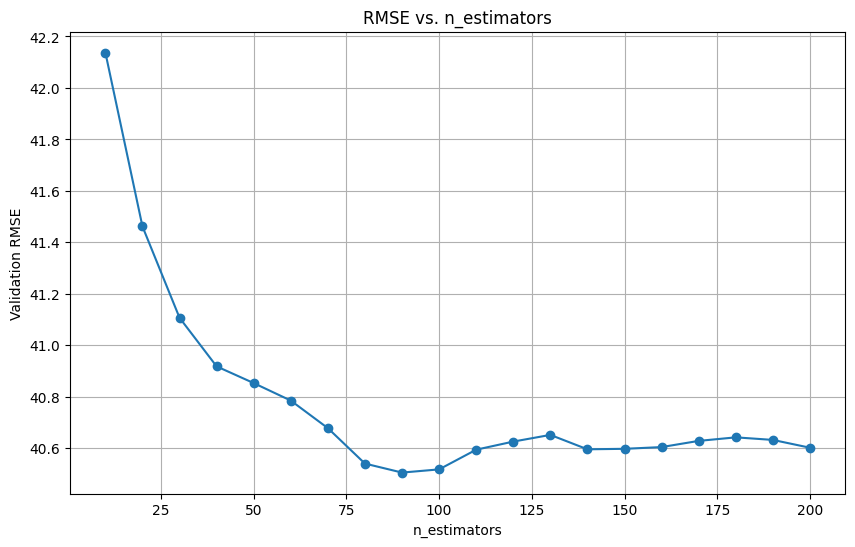

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_list, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Validation RMSE')
plt.title('RMSE vs. n_estimators')
plt.grid(True)
plt.show()


### Question 4


Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1
What's the best max_depth, using the mean RMSE?

10
15
20
25

In [ ]:
# Define the list of max_depth values
max_depth_values = [10, 15, 20, 25]

# Define n_estimators values from 10 to 200 with step 10
n_estimators_values = range(10, 201, 10)

# Dictionary to store mean RMSE for each max_depth
mean_rmse_dict = {}

for max_depth in max_depth_values:
    rmse_list = []
    for n_estimators in n_estimators_values:
        # Initialize the model with current max_depth and n_estimators
        rf = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=1,
            n_jobs=-1
        )
        
        # Train the model
        rf.fit(X_train, y_train)
        
        # Predict on the validation set
        y_pred = rf.predict(X_val)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        
        # Append RMSE to the list
        rmse_list.append(rmse)
    
    # Calculate mean RMSE for current max_depth
    mean_rmse = np.mean(rmse_list)
    mean_rmse_dict[max_depth] = mean_rmse
    
    # Print the mean RMSE for current max_depth
    print(f"max_depth: {max_depth}, Mean RMSE: {mean_rmse:.5f}")



max_depth: 10, Mean RMSE: 40.39250
max_depth: 15, Mean RMSE: 40.73528
max_depth: 20, Mean RMSE: 40.73973
max_depth: 25, Mean RMSE: 40.78787


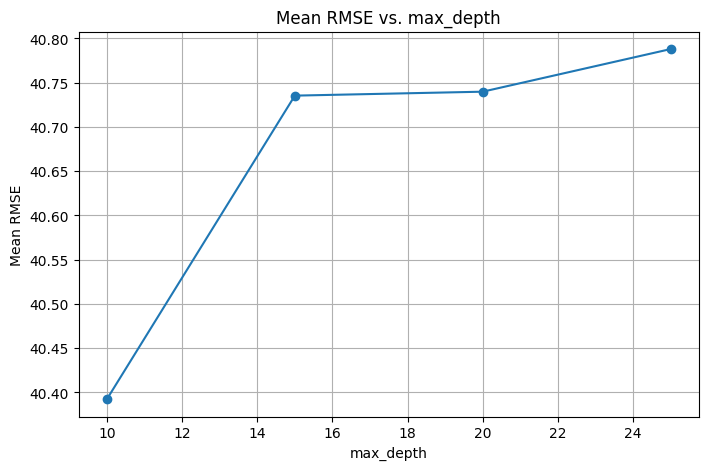

In [ ]:
# Extract max_depths and corresponding mean RMSEs
max_depths = list(mean_rmse_dict.keys())
mean_rmses = list(mean_rmse_dict.values())

# Plot
plt.figure(figsize=(8, 5))
plt.plot(max_depths, mean_rmses, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE vs. max_depth')
plt.grid(True)
plt.show()

### Question 5


We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature (among these 4)?

study_hours_per_week
attendance_rate
distance_to_school
teacher_quality

In [ ]:
# Initialize the model with the specified parameters
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1  # Optional, utilizes all available CPU cores
)

# Train the model on the training data
rf.fit(X_train, y_train)

# Get the feature importances from the model
importances = rf.feature_importances_

# Get the feature names from the DictVectorizer
feature_names = dv.get_feature_names_out()

# Create a DataFrame for better visualization
fi = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the features by importance
fi = fi.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the top features
print("Top features by importance:")
print(fi.head(10))


Top features by importance:
                            feature  importance
0              study_hours_per_week    0.248354
1                   attendance_rate    0.149729
2                distance_to_school    0.136486
3                   teacher_quality    0.082682
4                               age    0.069311
5             assignments_completed    0.031517
6         socioeconomic_status=High    0.025714
7           parent_involvement=High    0.022919
8                 it_knowledge=High    0.017719
9  parent_education_level=Secondary    0.016957


In [ ]:
# Extract the base feature name (before '=' sign if one-hot encoded)
fi['feature_group'] = fi['feature'].apply(lambda x: x.split('=')[0])

# Sum the importances for each feature group
fi_grouped = fi.groupby('feature_group')['importance'].sum().reset_index()

# Sort by importance
fi_grouped = fi_grouped.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the grouped feature importances
print("\nGrouped feature importances:")
print(fi_grouped.head(10))



Grouped feature importances:
            feature_group  importance
0    study_hours_per_week    0.248354
1         attendance_rate    0.149729
2      distance_to_school    0.136486
3         teacher_quality    0.082682
4                     age    0.069311
5      parent_involvement    0.047768
6    socioeconomic_status    0.046985
7  parent_education_level    0.046896
8            it_knowledge    0.039265
9   assignments_completed    0.031517


In [ ]:
# List of specified features to check
specified_features = [
    'study_hours_per_week',
    'attendance_rate',
    'distance_to_school',
    'teacher_quality'
]

# Filter the grouped DataFrame for the specified features
fi_specified = fi_grouped[fi_grouped['feature_group'].isin(specified_features)]

# Sort by importance
fi_specified = fi_specified.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the importances of the specified features
print("\nImportances of specified features:")
print(fi_specified)



Importances of specified features:
          feature_group  importance
0  study_hours_per_week    0.248354
1       attendance_rate    0.149729
2    distance_to_school    0.136486
3       teacher_quality    0.082682


### Question 6


Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

0.3
0.1
Both give equal value

In [ ]:
# Create DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)

# Create DMatrix for validation
dval = xgb.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3,                # Learning rate
    'max_depth': 6,            # Maximum depth of a tree
    'min_child_weight': 1,     # Minimum sum of instance weight (hessian) needed in a child
    'objective': 'reg:squarederror',  # Regression task
    'nthread': 8,              # Number of parallel threads
    'seed': 1,                 # Random seed
    'verbosity': 1             # Verbosity of printing messages
}

# Set eta to 0.3
xgb_params['eta'] = 0.3

# Train the model
model_eta_0_3 = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=100,   # Number of boosting rounds
    evals=watchlist,       # List of items to evaluate during training
    early_stopping_rounds=10  # Stop training if no improvement after 10 rounds
)

best_rmse_eta_0_3 = model_eta_0_3.best_score
best_iteration_eta_0_3 = model_eta_0_3.best_iteration

print(f"Best RMSE with eta=0.3: {best_rmse_eta_0_3:.5f} at iteration {best_iteration_eta_0_3}")



NameError: name 'xgb' is not defined

In [ ]:
# Set eta to 0.1
xgb_params['eta'] = 0.1

# Train the model
model_eta_0_1 = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=watchlist,
    early_stopping_rounds=10
)
